# Prince kr shamra
Future Data scientist

# K-Nearest Neighbors classifier

* K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique.
* K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.
* K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.
* K-NN algorithm can be used for Regression as well as for Classification but mostly it is used for the Classification problems.
* K-NN is a non-parametric algorithm, which means it does not make any assumption on underlying data.
* It is also called a lazy learner algorithm because it does not learn from the training set immediately instead it stores the dataset and at the time of classification, it performs an action on the dataset.

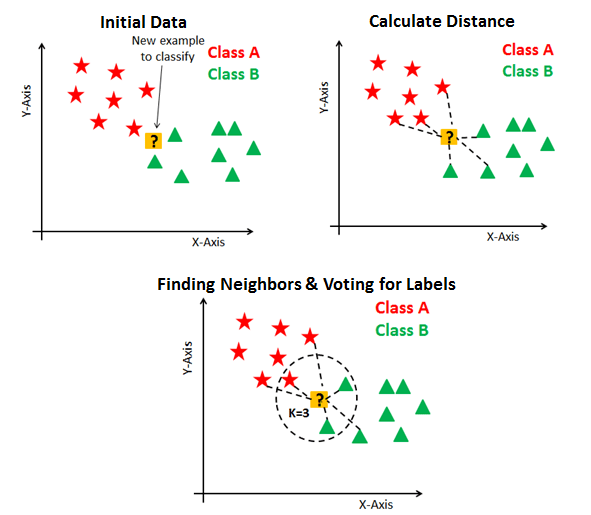

## What is k in K-Nearest Neighbors ?
* Here k denotes the number of neighbors point to be considered while assigning the class to the query point.
*  OR
* Here K denotes the number of neighboring points to be considered while assigning the class to the query point.

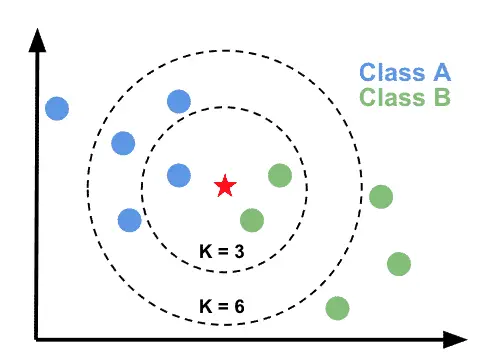

# Distance 
* In this Algorithm we use distance to find the neighbors According to k value
*  Most of time we use Euclidean Distance to find the distance because its find the hypotenis

## There Are Three type of Distance we Use in Machine Learning
1. Euclidean Distance
2. Manhattan Distance
3. Minkawski Distance

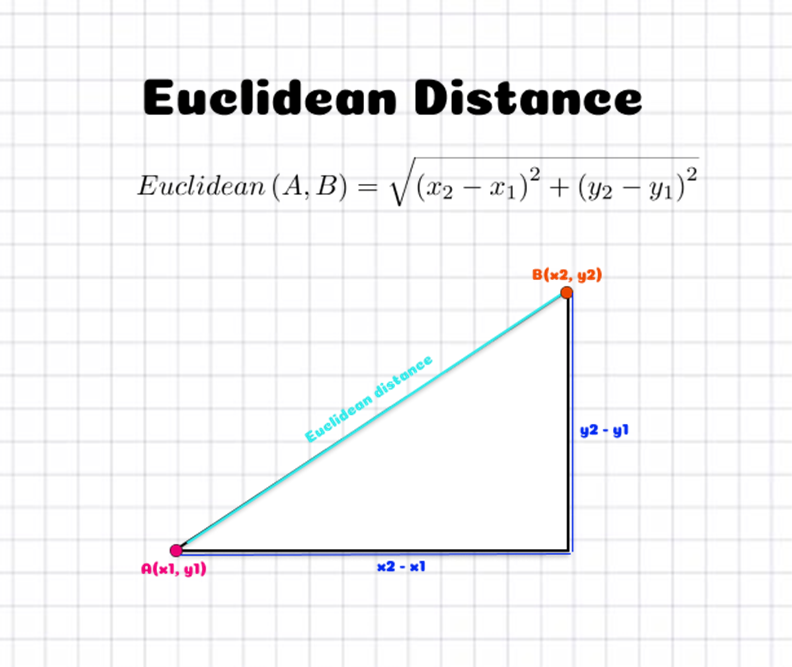

### Most of time we use Euclidean Distance

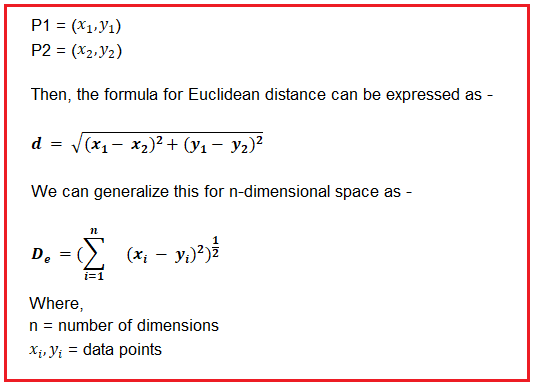

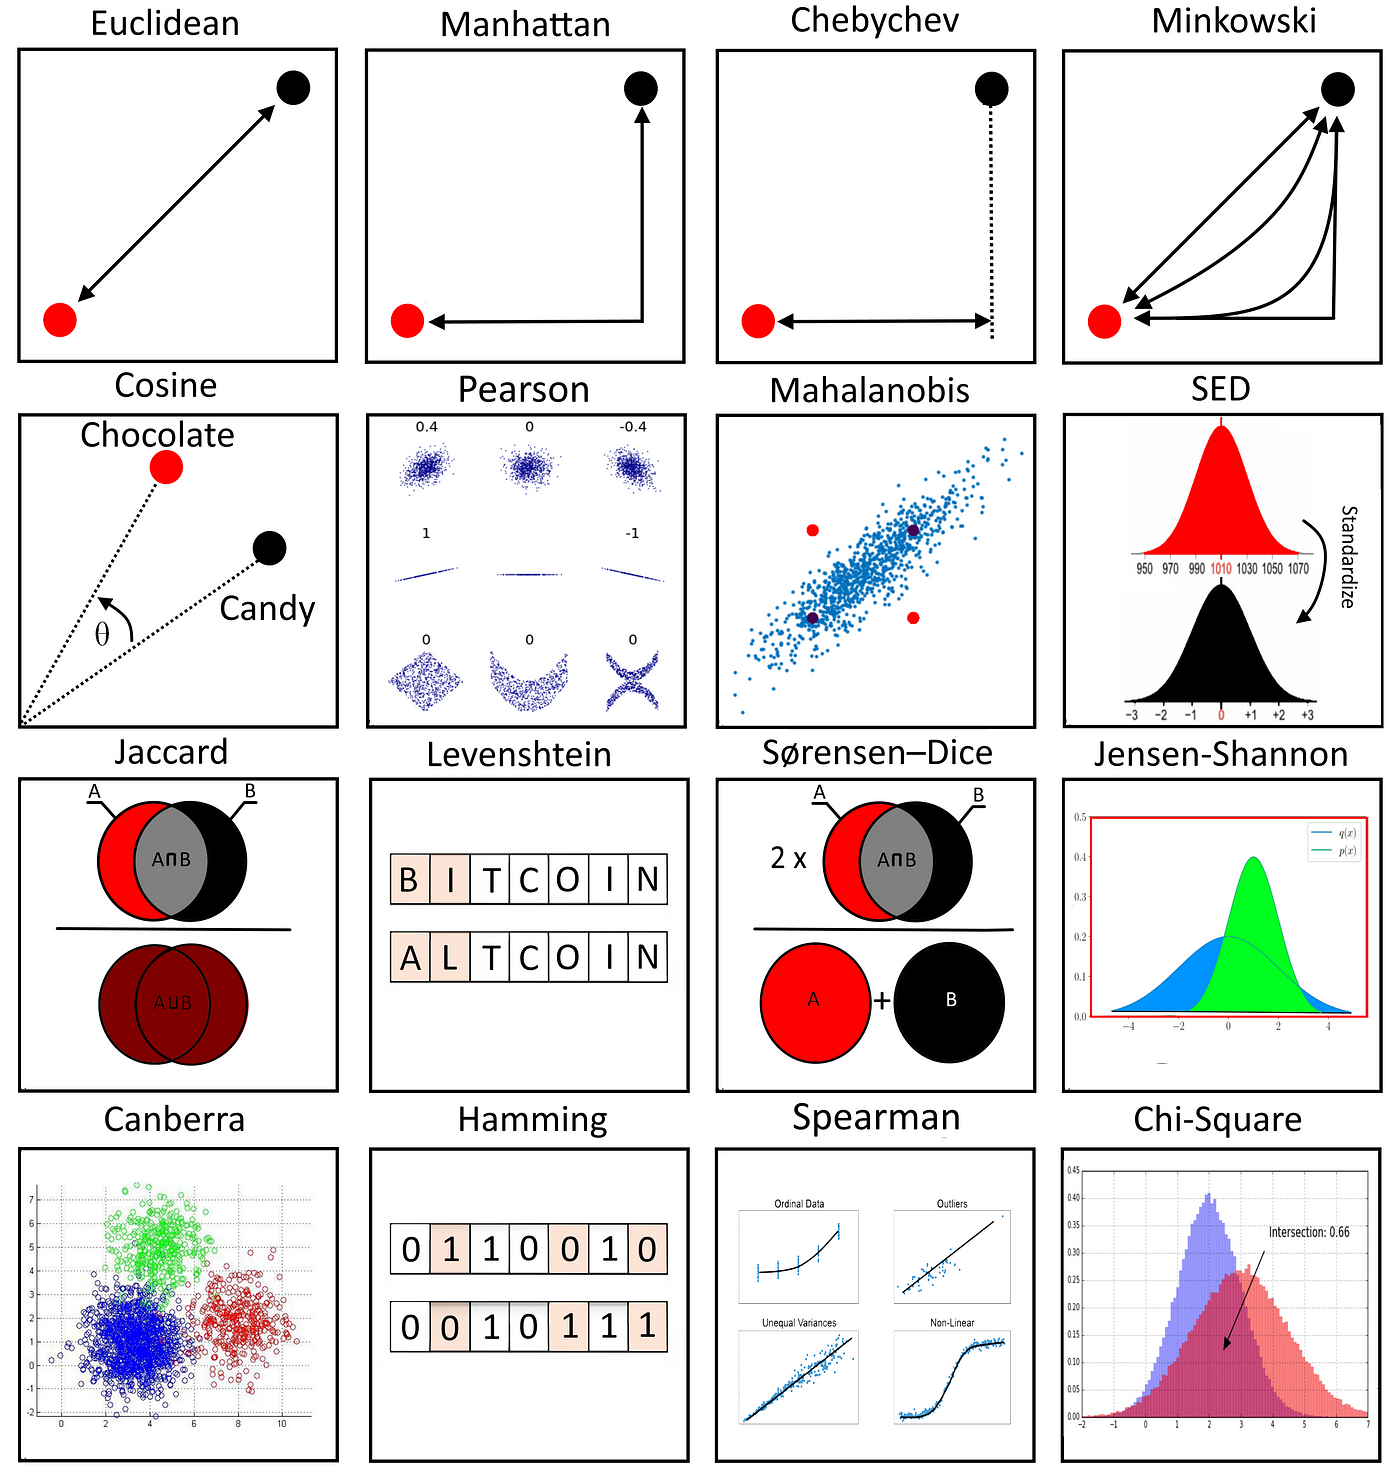

# Import the Usefull Library

In [80]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import missingno as mns
import pylab
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier

# Data Preprocessing

In [81]:
df=pd.read_csv("breast_cancer.csv")

In [3]:
df.head()

,id,climp_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1000025.0,5.0,1.0,1.0,1.0,2.0,1,3.0,1.0,1.0,2.0
4,1002945.0,5.0,4.0,4.0,5.0,7.0,10,3.0,2.0,1.0,2.0


In [4]:
# Droping the starting of three null rows
df.drop([0,1,2],inplace=True)

In [5]:
# Reseting the index of dataset
df=df.reset_index(drop=True)

In [6]:
df.head()

,id,climp_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,1000025.0,5.0,1.0,1.0,1.0,2.0,1,3.0,1.0,1.0,2.0
1,1002945.0,5.0,4.0,4.0,5.0,7.0,10,3.0,2.0,1.0,2.0
2,1015425.0,3.0,1.0,1.0,1.0,2.0,2,3.0,1.0,1.0,2.0
3,1016277.0,6.0,8.0,8.0,1.0,3.0,4,3.0,7.0,1.0,2.0
4,1017023.0,4.0,1.0,1.0,3.0,2.0,1,3.0,1.0,1.0,2.0


#### Waatchinging the shape of the dataset

In [7]:
df.shape

(699, 11)

In [8]:
print(f"There is {df.shape[0]} Rows and {df.shape[1]} Columns in This Dataset")

There is 699 Rows and 11 Columns in This Dataset


### show the information of the dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      699 non-null    float64
 1   climp_thickness         699 non-null    float64
 2   unif_cell_size          699 non-null    float64
 3   unif_cell_shape         699 non-null    float64
 4   marg_adhesion           699 non-null    float64
 5   single_epith_cell_size  699 non-null    float64
 6   bare_nuclei             699 non-null    object 
 7   bland_chrom             699 non-null    float64
 8   norm_nucleoli           699 non-null    float64
 9   mitoses                 699 non-null    float64
 10  class                   699 non-null    float64
dtypes: float64(10), object(1)
memory usage: 60.2+ KB


## Cheak the Null value

In [10]:
df.isna().sum()

id                        0
climp_thickness           0
unif_cell_size            0
unif_cell_shape           0
marg_adhesion             0
single_epith_cell_size    0
bare_nuclei               0
bland_chrom               0
norm_nucleoli             0
mitoses                   0
class                     0
dtype: int64

#### There is No Null value in this dataset

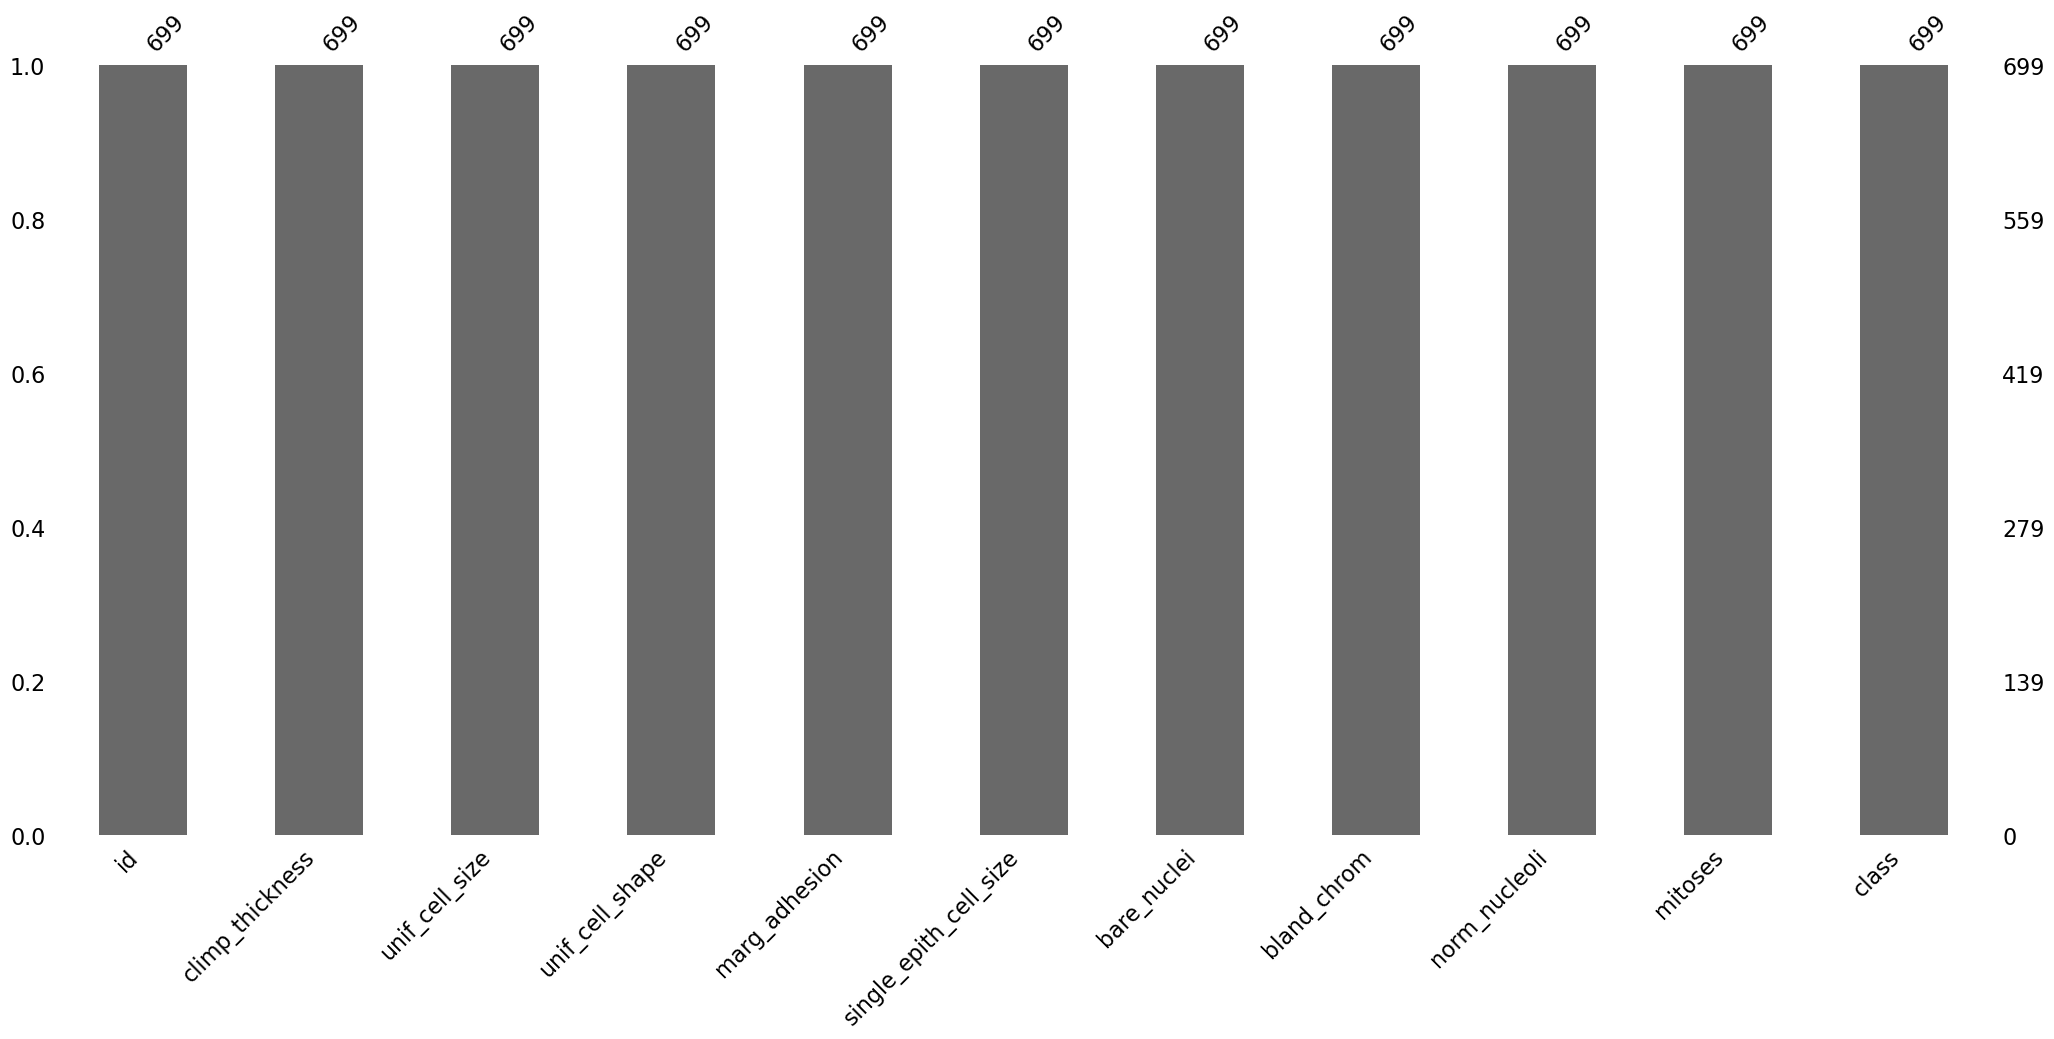

In [11]:
mns.bar(df);

In [12]:
df.tail()

,id,climp_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
694,776715.0,3.0,1.0,1.0,1.0,3.0,2,1.0,1.0,1.0,2.0
695,841769.0,2.0,1.0,1.0,1.0,2.0,1,1.0,1.0,1.0,2.0
696,888820.0,5.0,10.0,10.0,3.0,7.0,3,8.0,10.0,2.0,4.0
697,897471.0,4.0,8.0,6.0,4.0,3.0,4,10.0,6.0,1.0,4.0
698,897471.0,4.0,8.0,8.0,5.0,4.0,5,10.0,4.0,1.0,4.0


In [13]:
# Cheaking the unique value
df.nunique()

id                        645
climp_thickness            10
unif_cell_size             10
unif_cell_shape            10
marg_adhesion              10
single_epith_cell_size     10
bare_nuclei                11
bland_chrom                10
norm_nucleoli              10
mitoses                     9
class                       2
dtype: int64

In [14]:
df.head()

,id,climp_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,1000025.0,5.0,1.0,1.0,1.0,2.0,1,3.0,1.0,1.0,2.0
1,1002945.0,5.0,4.0,4.0,5.0,7.0,10,3.0,2.0,1.0,2.0
2,1015425.0,3.0,1.0,1.0,1.0,2.0,2,3.0,1.0,1.0,2.0
3,1016277.0,6.0,8.0,8.0,1.0,3.0,4,3.0,7.0,1.0,2.0
4,1017023.0,4.0,1.0,1.0,3.0,2.0,1,3.0,1.0,1.0,2.0


In [15]:
# Drop the id column because that is not useful in my dataset
df.drop("id",axis=1,inplace=True)

In [16]:
df.tail()

,climp_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
694,3.0,1.0,1.0,1.0,3.0,2,1.0,1.0,1.0,2.0
695,2.0,1.0,1.0,1.0,2.0,1,1.0,1.0,1.0,2.0
696,5.0,10.0,10.0,3.0,7.0,3,8.0,10.0,2.0,4.0
697,4.0,8.0,6.0,4.0,3.0,4,10.0,6.0,1.0,4.0
698,4.0,8.0,8.0,5.0,4.0,5,10.0,4.0,1.0,4.0


# EDA (Exploratory Data Analysis)

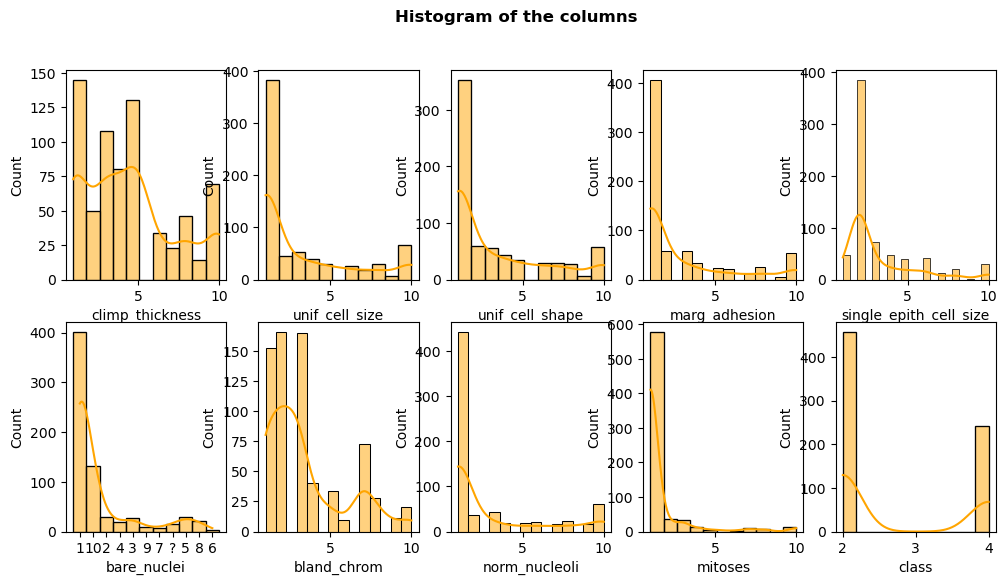

In [17]:
plt.figure(figsize=(12,6))
for i,j in enumerate(df):
    plt.subplot(2,5,i+1)
    sns.histplot(df[j],kde=True,color="orange")
plt.suptitle("Histogram of the columns",fontweight="bold",color="black")
plt.show()

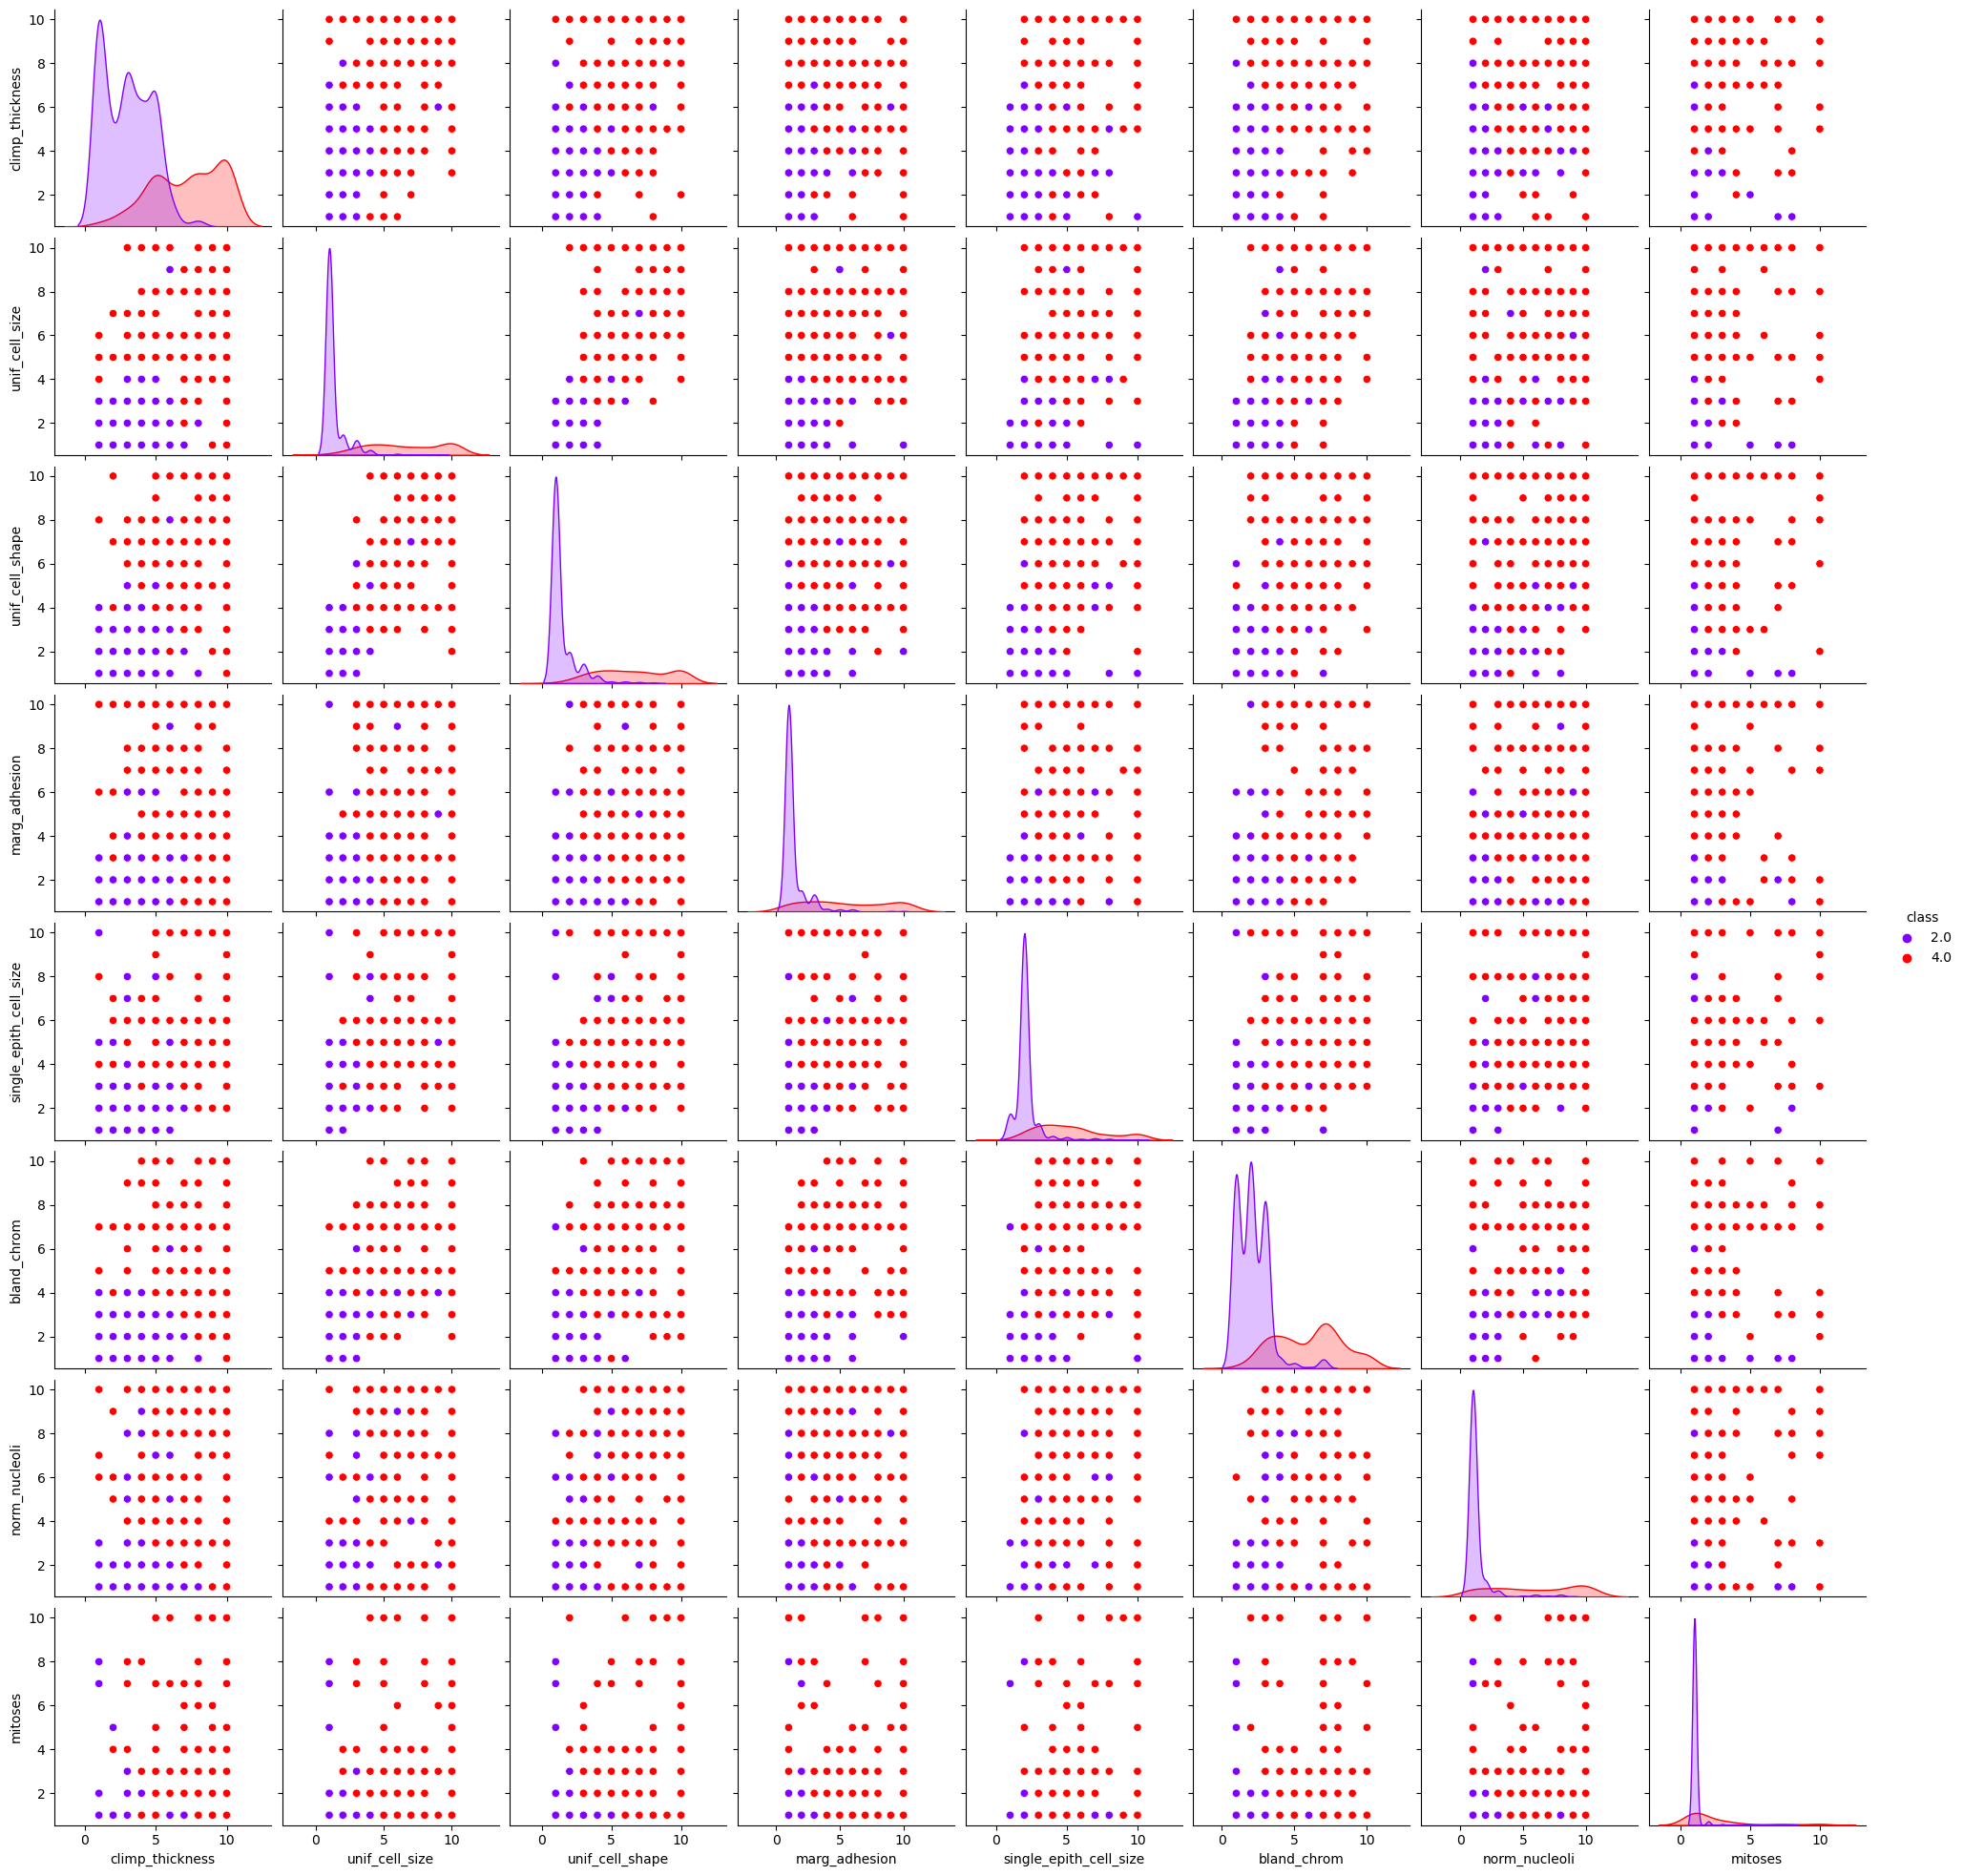

In [18]:
sns.pairplot(df,hue="class",palette="rainbow");

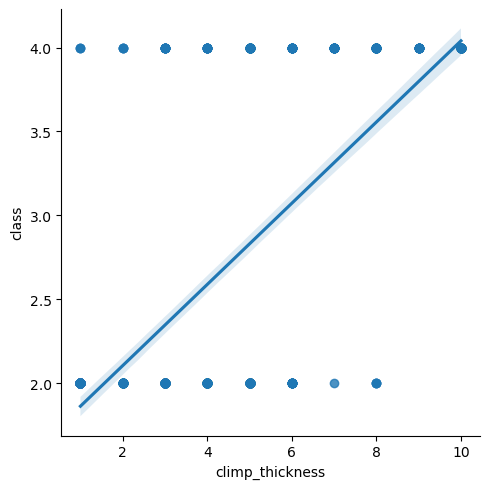

In [19]:
# plotting the scatterplot with the climp_thickness and class
sns.lmplot(x='climp_thickness',y="class",data=df,palette="rainbow");

In [20]:
df.head()

,climp_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,5.0,1.0,1.0,1.0,2.0,1,3.0,1.0,1.0,2.0
1,5.0,4.0,4.0,5.0,7.0,10,3.0,2.0,1.0,2.0
2,3.0,1.0,1.0,1.0,2.0,2,3.0,1.0,1.0,2.0
3,6.0,8.0,8.0,1.0,3.0,4,3.0,7.0,1.0,2.0
4,4.0,1.0,1.0,3.0,2.0,1,3.0,1.0,1.0,2.0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   climp_thickness         699 non-null    float64
 1   unif_cell_size          699 non-null    float64
 2   unif_cell_shape         699 non-null    float64
 3   marg_adhesion           699 non-null    float64
 4   single_epith_cell_size  699 non-null    float64
 5   bare_nuclei             699 non-null    object 
 6   bland_chrom             699 non-null    float64
 7   norm_nucleoli           699 non-null    float64
 8   mitoses                 699 non-null    float64
 9   class                   699 non-null    float64
dtypes: float64(9), object(1)
memory usage: 54.7+ KB


In [22]:
df["bare_nuclei"].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [23]:
df["bare_nuclei"]=df["bare_nuclei"].replace("?","1")

In [24]:
df["bare_nuclei"].unique()

array(['1', '10', '2', '4', '3', '9', '7', '5', '8', '6'], dtype=object)

In [25]:
df["bare_nuclei"]=df["bare_nuclei"].astype(int)

In [26]:
df

,climp_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,5.0,1.0,1.0,1.0,2.0,1,3.0,1.0,1.0,2.0
1,5.0,4.0,4.0,5.0,7.0,10,3.0,2.0,1.0,2.0
2,3.0,1.0,1.0,1.0,2.0,2,3.0,1.0,1.0,2.0
3,6.0,8.0,8.0,1.0,3.0,4,3.0,7.0,1.0,2.0
4,4.0,1.0,1.0,3.0,2.0,1,3.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...
694,3.0,1.0,1.0,1.0,3.0,2,1.0,1.0,1.0,2.0
695,2.0,1.0,1.0,1.0,2.0,1,1.0,1.0,1.0,2.0
696,5.0,10.0,10.0,3.0,7.0,3,8.0,10.0,2.0,4.0
697,4.0,8.0,6.0,4.0,3.0,4,10.0,6.0,1.0,4.0


In [27]:
# Information of this dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   climp_thickness         699 non-null    float64
 1   unif_cell_size          699 non-null    float64
 2   unif_cell_shape         699 non-null    float64
 3   marg_adhesion           699 non-null    float64
 4   single_epith_cell_size  699 non-null    float64
 5   bare_nuclei             699 non-null    int32  
 6   bland_chrom             699 non-null    float64
 7   norm_nucleoli           699 non-null    float64
 8   mitoses                 699 non-null    float64
 9   class                   699 non-null    float64
dtypes: float64(9), int32(1)
memory usage: 52.0 KB


###  Extract the Features and labels

In [28]:
x=df.drop(columns=["class"])

In [29]:
x.head()

,climp_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses
0,5.0,1.0,1.0,1.0,2.0,1,3.0,1.0,1.0
1,5.0,4.0,4.0,5.0,7.0,10,3.0,2.0,1.0
2,3.0,1.0,1.0,1.0,2.0,2,3.0,1.0,1.0
3,6.0,8.0,8.0,1.0,3.0,4,3.0,7.0,1.0
4,4.0,1.0,1.0,3.0,2.0,1,3.0,1.0,1.0


In [30]:
sc=StandardScaler()
x1=sc.fit_transform(x)

In [31]:
x1

array([[ 0.20693572, -0.69999505, -0.74329904, ..., -0.17966213,
        -0.61182504, -0.34391178],
       [ 0.20693572,  0.28384518,  0.2668747 , ..., -0.17966213,
        -0.28411186, -0.34391178],
       [-0.50386559, -0.69999505, -0.74329904, ..., -0.17966213,
        -0.61182504, -0.34391178],
       ...,
       [ 0.20693572,  2.25152563,  2.28722218, ...,  1.87236122,
         2.33759359,  0.23956962],
       [-0.14846494,  1.59563215,  0.94032386, ...,  2.69317056,
         1.02674087, -0.34391178],
       [-0.14846494,  1.59563215,  1.61377302, ...,  2.69317056,
         0.37131451, -0.34391178]])

In [32]:
y=df[["class"]]

In [33]:
y

,class
0,2.0
1,2.0
2,2.0
3,2.0
4,2.0
...,...
694,2.0
695,2.0
696,4.0
697,4.0


In [34]:
# Use train test split with the help of sklearn.model_selection
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.3,random_state=12)

In [35]:
print("x"*100)
print(f"shape of the x_train {x_train.shape}")
print("x"*100)
print(f"The shape of the x_test : {x_test.shape}")
print("x"*100)
print(f"The shape of the y_train : {y_train.shape}")
print("x"*100)
print(f"The shape of the y_test : {y_test.shape}")
print("x"*100)

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
shape of the x_train (489, 9)
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
The shape of the x_test : (210, 9)
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
The shape of the y_train : (489, 1)
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
The shape of the y_test : (210, 1)
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


## Apply the (K-NN) K-Nearest Neighbors

In [36]:
knn=KNeighborsClassifier(n_neighbors=7,metric="euclidean")
knn.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [37]:
pred=knn.predict(x_test)
pred2=knn.predict(x_train)

In [38]:
print("x"*100)
print(f"Predictions of x_test : {pred}")
print("x"*100)
print(f"Prediction of x_train : {pred2}")
print("x"*100)

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Predictions of x_test : [2. 2. 2. 4. 2. 4. 4. 2. 4. 2. 2. 2. 2. 2. 2. 2. 2. 4. 4. 4. 2. 2. 2. 4.
 2. 4. 4. 2. 2. 4. 4. 4. 2. 4. 4. 4. 2. 2. 2. 4. 4. 2. 2. 2. 2. 4. 4. 2.
 2. 4. 2. 4. 2. 2. 2. 2. 4. 4. 2. 4. 2. 2. 2. 2. 2. 4. 2. 4. 2. 2. 2. 2.
 4. 4. 2. 2. 2. 2. 2. 2. 2. 4. 2. 2. 4. 2. 2. 4. 2. 2. 4. 2. 2. 4. 4. 2.
 2. 2. 2. 4. 4. 2. 2. 4. 4. 2. 2. 2. 2. 2. 2. 4. 2. 2. 2. 4. 2. 4. 2. 4.
 2. 4. 4. 2. 2. 2. 2. 2. 4. 4. 2. 2. 2. 2. 2. 4. 4. 4. 4. 4. 2. 4. 2. 4.
 4. 2. 2. 2. 2. 2. 2. 2. 4. 2. 2. 2. 2. 2. 4. 4. 2. 2. 4. 2. 4. 2. 2. 2.
 2. 2. 2. 2. 4. 4. 4. 4. 2. 4. 4. 4. 4. 4. 2. 4. 2. 2. 2. 2. 2. 4. 4. 4.
 4. 2. 2. 2. 4. 4. 2. 4. 2. 4. 2. 2. 2. 4. 2. 4. 2. 2.]
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Prediction of x_train : [2. 2. 2. 2. 4. 2. 4. 4. 2. 4. 2. 4. 2. 2. 2. 4. 2. 2. 4. 2. 2. 2. 2. 4.
 2. 2. 2. 2. 2. 4. 2. 2. 4. 2. 2. 2. 

In [39]:
ac=knn.score(x_test,y_test)
ac2=knn.score(x_train,y_train)

In [40]:
print("x"*100)
print(f"Accuracy of the training data :- {ac2}")
print("x"*100)
print(f"Accuracy of the testing data :- {ac}")
print("x"*100)

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Accuracy of the training data :- 0.9652351738241309
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Accuracy of the testing data :- 0.9809523809523809
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


In [41]:
cm=confusion_matrix(y_test,pred)

In [42]:
print(f"Confusion Matrix :\n {cm}")

Confusion Matrix :
 [[129   3]
 [  1  77]]


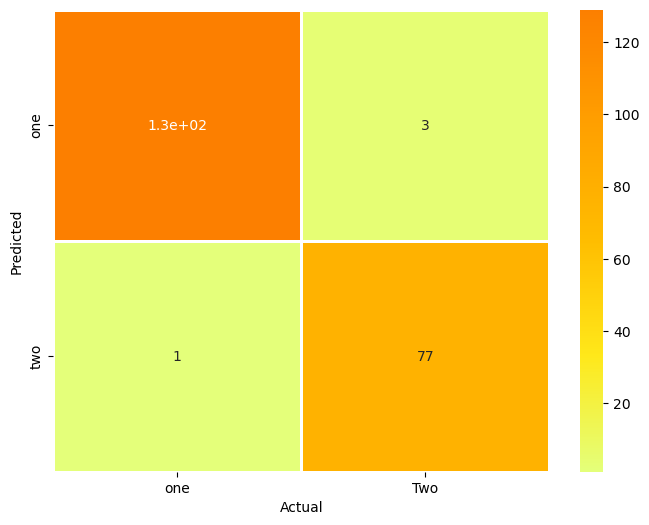

In [43]:
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,cmap="Wistia",linecolor="white",linewidths=1,xticklabels=["one","Two"],yticklabels=["one","two"])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [44]:
clr=classification_report(y_test,pred)

In [45]:
print("x"*100)
print(clr)
print("x"*100)

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
              precision    recall  f1-score   support

         2.0       0.99      0.98      0.98       132
         4.0       0.96      0.99      0.97        78

    accuracy                           0.98       210
   macro avg       0.98      0.98      0.98       210
weighted avg       0.98      0.98      0.98       210

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


## Hypertunnig the perameter

In [48]:
kn=KNeighborsClassifier()
par={"n_neighbors":[3,7,5,9,11,12,15,17,19,21,101,109,151],
    "algorithm":['auto','ball_tree','kd_tree','brute'],
     "metric":["euclidean","minkowski"],
     "leaf_size":[30,35,48,80,100,150,200]}
par

{'n_neighbors': [3, 7, 5, 9, 11, 12, 15, 17, 19, 21, 101, 109, 151],
 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
 'metric': ['euclidean', 'minkowski'],
 'leaf_size': [30, 35, 48, 80, 100, 150, 200]}

In [50]:
grd=GridSearchCV(kn,param_grid=par,cv=5,n_jobs=-1)
grd.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [30, 35, 48, 80, 100, 150, 200],
                         'metric': ['euclidean', 'minkowski'],
                         'n_neighbors': [3, 7, 5, 9, 11, 12, 15, 17, 19, 21,
                                         101, 109, 151]})

In [55]:
print("x"*100)
parm=grd.best_params_
print(parm)
print("x"*100)

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'euclidean', 'n_neighbors': 19}
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


In [56]:
grd.score(x_test,y_test)

0.9714285714285714

In [57]:
grd.score(x_train,y_train)

0.967280163599182

##### Aplying the model k-Nearest Neighbors with hypertuned parameters

In [59]:
knnc=KNeighborsClassifier(**parm)
knnc.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=19)

### Predict the without labeled data

In [62]:
pr=knnc.predict(x_test)
print("x"*100)
print(pr)
print("x"*100)

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
[2. 2. 2. 4. 2. 4. 4. 2. 4. 2. 2. 2. 2. 2. 2. 2. 2. 4. 4. 4. 2. 2. 2. 4.
 2. 4. 4. 2. 2. 4. 4. 4. 2. 4. 4. 4. 2. 2. 2. 4. 4. 2. 2. 2. 2. 4. 4. 2.
 2. 2. 2. 4. 2. 2. 2. 2. 4. 4. 2. 4. 2. 2. 2. 2. 2. 4. 2. 4. 2. 2. 2. 2.
 4. 4. 2. 2. 2. 2. 2. 2. 2. 4. 2. 2. 4. 2. 2. 4. 2. 2. 4. 2. 2. 4. 4. 2.
 4. 2. 2. 4. 4. 2. 2. 4. 4. 2. 2. 2. 2. 2. 2. 4. 2. 2. 2. 4. 2. 4. 2. 4.
 2. 4. 4. 2. 2. 2. 2. 2. 4. 4. 2. 2. 2. 2. 2. 4. 4. 4. 4. 4. 2. 4. 2. 4.
 4. 2. 2. 2. 2. 2. 2. 2. 4. 2. 2. 2. 2. 2. 4. 4. 2. 2. 4. 2. 4. 2. 2. 2.
 2. 2. 2. 2. 4. 4. 4. 4. 2. 4. 4. 4. 4. 4. 2. 4. 2. 2. 2. 2. 2. 4. 4. 4.
 4. 2. 2. 2. 4. 4. 2. 4. 2. 4. 2. 2. 2. 4. 2. 4. 2. 2.]
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


## Check the Accuracy of the predicted model and trained model


In [63]:
act=knnc.score(x_test,y_test)
act2=knnc.score(x_train,y_train)

In [64]:
print("x"*100)
print(f"Accuracy of the test data :- {act}")
print("x"*100)
print(f"Accuracy of the train data :- {act2}")
print("x"*100)

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Accuracy of the test data :- 0.9714285714285714
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Accuracy of the train data :- 0.967280163599182
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


### Let's Evaluate the error in test  dataset with the help of the confusion matrix

In [65]:
cm=confusion_matrix(y_test,pred)

In [66]:
print("x"*100)
print(cm)
print("x"*100)

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
[[129   3]
 [  1  77]]
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


#### Visulize the confusion matrix with with the Heatmap : Its show the colorfull box to analyse the error

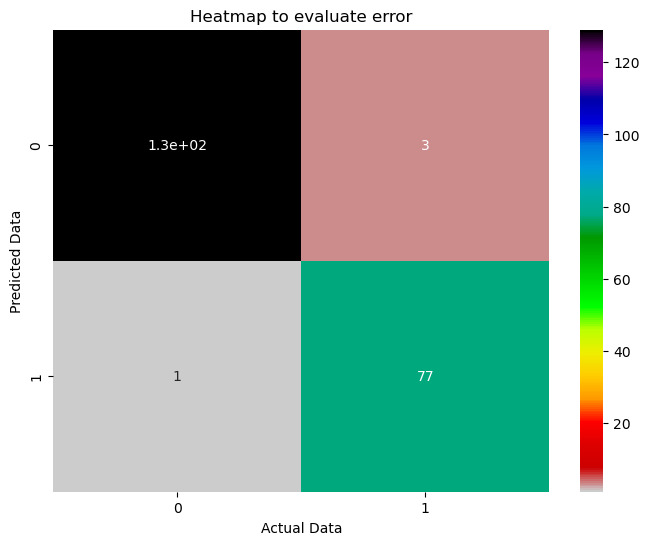

In [75]:
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,cmap="nipy_spectral_r")
plt.title("Heatmap to evaluate error",color="black")
plt.xlabel("Actual Data")
plt.ylabel("Predicted Data")
plt.show()

#### Here Clearly show that there is Number of error in this test data is 4.

## So Finnaly show the classification Report 

In [76]:
clr=classification_report(y_test,pred)

In [79]:
print("-"*100)
print(clr)
print("-"*100)

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         2.0       0.99      0.98      0.98       132
         4.0       0.96      0.99      0.97        78

    accuracy                           0.98       210
   macro avg       0.98      0.98      0.98       210
weighted avg       0.98      0.98      0.98       210

----------------------------------------------------------------------------------------------------


# Overview

# Advantages of KNN Algorithm:
* It is simple to implement.
* It is robust to the noisy training data
* It can be more effective if the training data is large.
# Disadvantages of KNN Algorithm:
* Always needs to determine the value of K which may be complex some time.
* The computation cost is high because of calculating the distance between the data points for all the training samples.

### 🙂🙂🙂Thanks for watching my notes-----------------------------------------------